# DIC Spring 2018 - Lab1 Part 2

# Submitted by - asinha6 and sdhar2 | March 8, 2019

##### Define the margin and no-cropping of the plots on Jupyter - 

In [4]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)

#  Analysis - Influenza Positive Test for 2018-2019 Season till Week4, 2019  Reported by Clinical Labs

This graph has been plotted using ggplot2 barplot and line methods - geom_bar and geom_line

The data of the weeks Total A positive, Total B positive, Total % positive, % A positive and % B positive was extracted
from the loaded data from the CSV file

The x-axis was plotted with a vector of the Week names, and primary y-axis as a limit of a vector from 0 to 14000 representing the Number of Positive Specimens.

The secondary y-axis was plotted using the ggplot command scale_y_continuous and sec.axis. The secondary y-axis is a 
transformed version of the primary y-axis with a scaling factor of (primary/350). So, all % Positive Specimens values 
represented by the lines are scaled up to match the scaling. Therefore, all % values are multiplied by 340-350 for scaling up. 

Solid black line represents % Total Positive, Yellow Dotted line represents % A positive and Green Dotted Line represents
% B positive. 

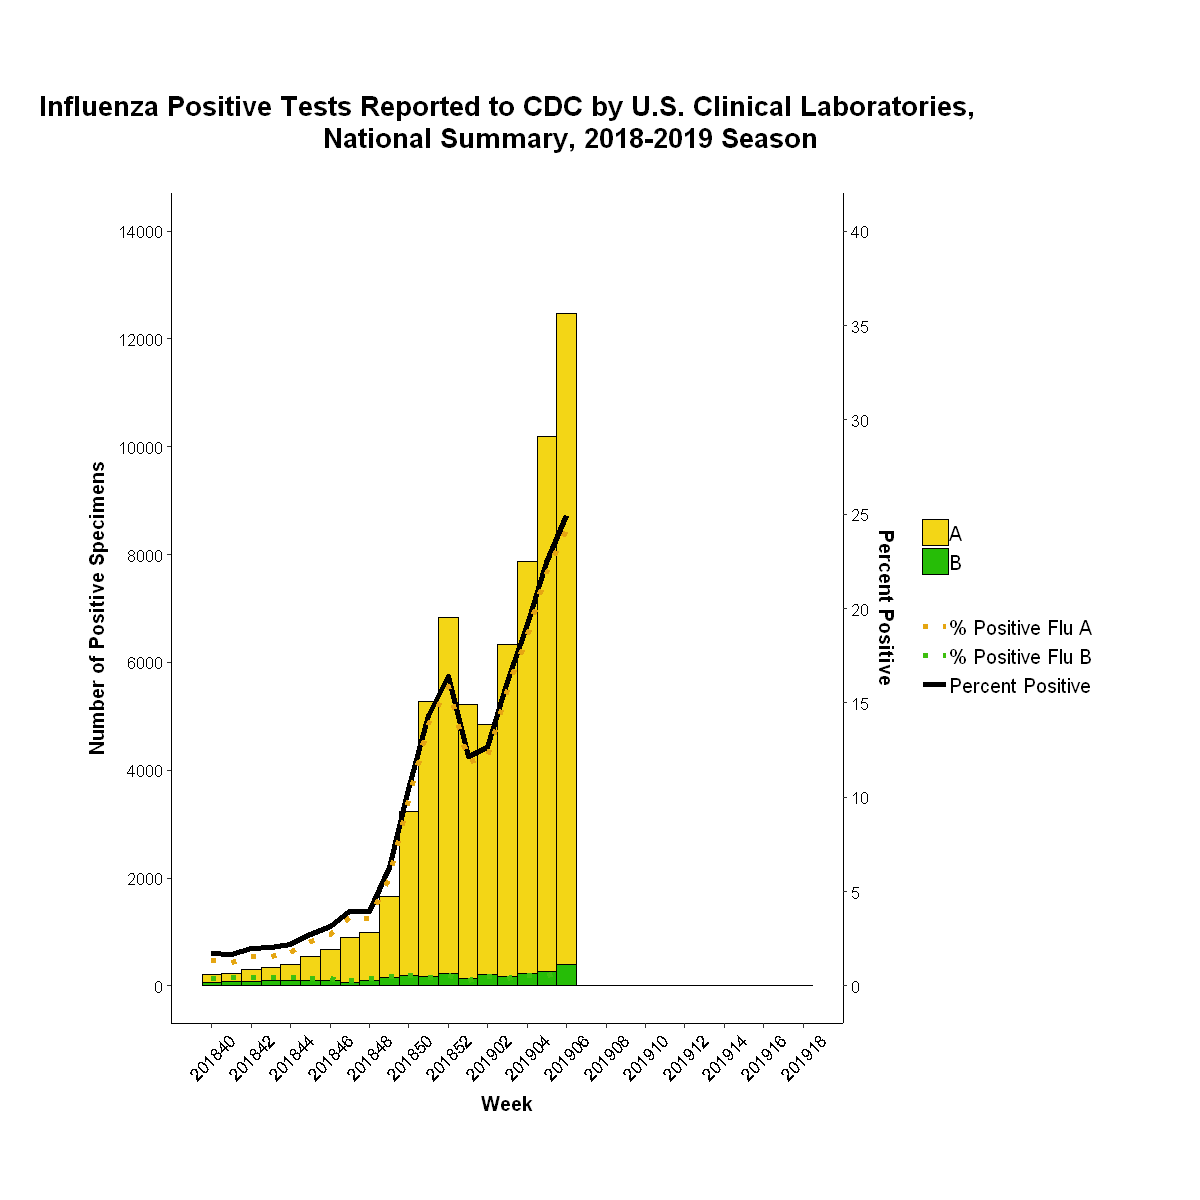

In [5]:
########################### 1 - Plot the data on positive results by Clinical Data ###########################################
# Ggplot2 library
library(ggplot2)

clinical <- read.csv('data/WHO_NREVSS_Clinical_Labs.csv', skip=1, header=TRUE)

data_positive <- clinical[,4:7]
data_positive[2] <- NULL

WEEK <- c("201840", "201842", "201844", "201846", "201848", "201850", "201852", "201902", "201904", "201906", "201908", "201910", "201912", "201914", "201916", "201918")
x <- c(1:length(data_positive[,1]))
A <- data_positive[,2]
B <- data_positive[,3]


percent_total <- clinical[,8]
percent_A <- clinical[,9]
percent_B <- clinical[,10]

len_x <- 2*length(WEEK)

clin_xaxis <- scale_x_continuous(breaks = seq(1, len_x, by = 2), labels = WEEK)
clin_yaxis <- scale_y_continuous(limits = c(0, 14000), breaks = seq(0,14000, by=2000), sec.axis = sec_axis(trans = ~./350, name = "Percent Positive", breaks = seq(0, 40, by=5)))
clin_plot_theme <- theme(panel.background = element_blank(),
                    plot.margin = unit(c(2,2,2,2), "cm"),
                    plot.title=element_text(size=16, 
                                            face="bold", 
                                            color="black",
                                            hjust=0.5,
                                            lineheight=1.0),  # title
                    plot.subtitle=element_text(size=16, 
                                               color = "black",
                                               face="bold",
                                               hjust=0.5),  # subtitle
                    plot.caption=element_text(size=15),  # caption
                    axis.title.x=element_text(vjust=-1.5,  
                                              size=12, color="black", face="bold"),
                    axis.title.y = element_text(vjust=3, size=12, color="black", face="bold"),
                    axis.title.y.right = element_text(vjust=2, size=12, color="black", face="bold"),
                    axis.text.x = element_text(size=10,
                                               color="black",
                                             angle = 45,
                                             vjust=.5),  # X axis text
                    axis.text.y=element_text(size=10, color="black"),
                    axis.text.y.right=element_text(size=10, color="black"),
                    axis.line = element_line(color="black", size=0.5, linetype = 1),
                    legend.title = element_blank(),
                    legend.key = element_blank(),
                    legend.text = element_text(size=12))  # Y axis text

# png('1.Clinical_CDC_website.png')
clin <- ggplot(mapping = aes(x=x)) +  
    geom_bar(aes(y = A, fill = "A"), stat='identity', width=1, color="black") + 
    geom_bar(aes(y = B, fill = "B"), stat='identity', width=1, color="black") + 
    geom_line(aes(x=x[1:19], y = percent_total[1:19]*350, color="Percent Positive", group=1), stat='identity', size=1.5) +
    geom_line(aes(x=x[1:19], y = percent_B[1:19]*350, color = "% Positive Flu B"), stat="identity", size=1.5, linetype="dotted") + 
    geom_line(aes(x=x[1:19], y = percent_A[1:19]*350, color = "% Positive Flu A"), stat="identity", linetype="dotted", size=1.5) + 
    scale_fill_manual(name = "", values=c("A" = '#F3D616', "B" = '#26BD07')) +
    scale_color_manual(name="", values = c( "% Positive Flu B" = '#3EBF0F', "% Positive Flu A" = '#E5A612', "Percent Positive" = "black")) + 
    scale_linetype_manual(values = c(2, 2, 1)) +
    labs(title = "Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
                National Summary, 2018-2019 Season", y = "Number of Positive Specimens", x = "Week", subtitle = "") +
    clin_xaxis + clin_yaxis + clin_plot_theme +
    guides(color=guide_legend(order=2, override.aes=list(linetype=c("dotted", "dotted", "solid"))),
           fill=guide_legend(order=1))

clin
ggsave("1.Clinical_CDC_website.png", plot = clin, dpi=300, width = 30, height = 20, units="cm")
# dev.off()

# Analysis - Influenza Positive Test for Week 4, 2018 - Week 4, 2019, Year Long, Reported by Clinical Labs

First, we downloaded the data in the CSV file starting from week 40 of 2017 till week 4 of 2019. 

For this graph, we extracted the data from the CSV file from Week 4 of 2018 till Week 4 of 2019 in the similar manner as above. 
Next, all the respective columns of Positive A Specimens, Positive B Specimens, Total Percent Positive, % A Positive and % B Positive were plotted using the same means as above. 

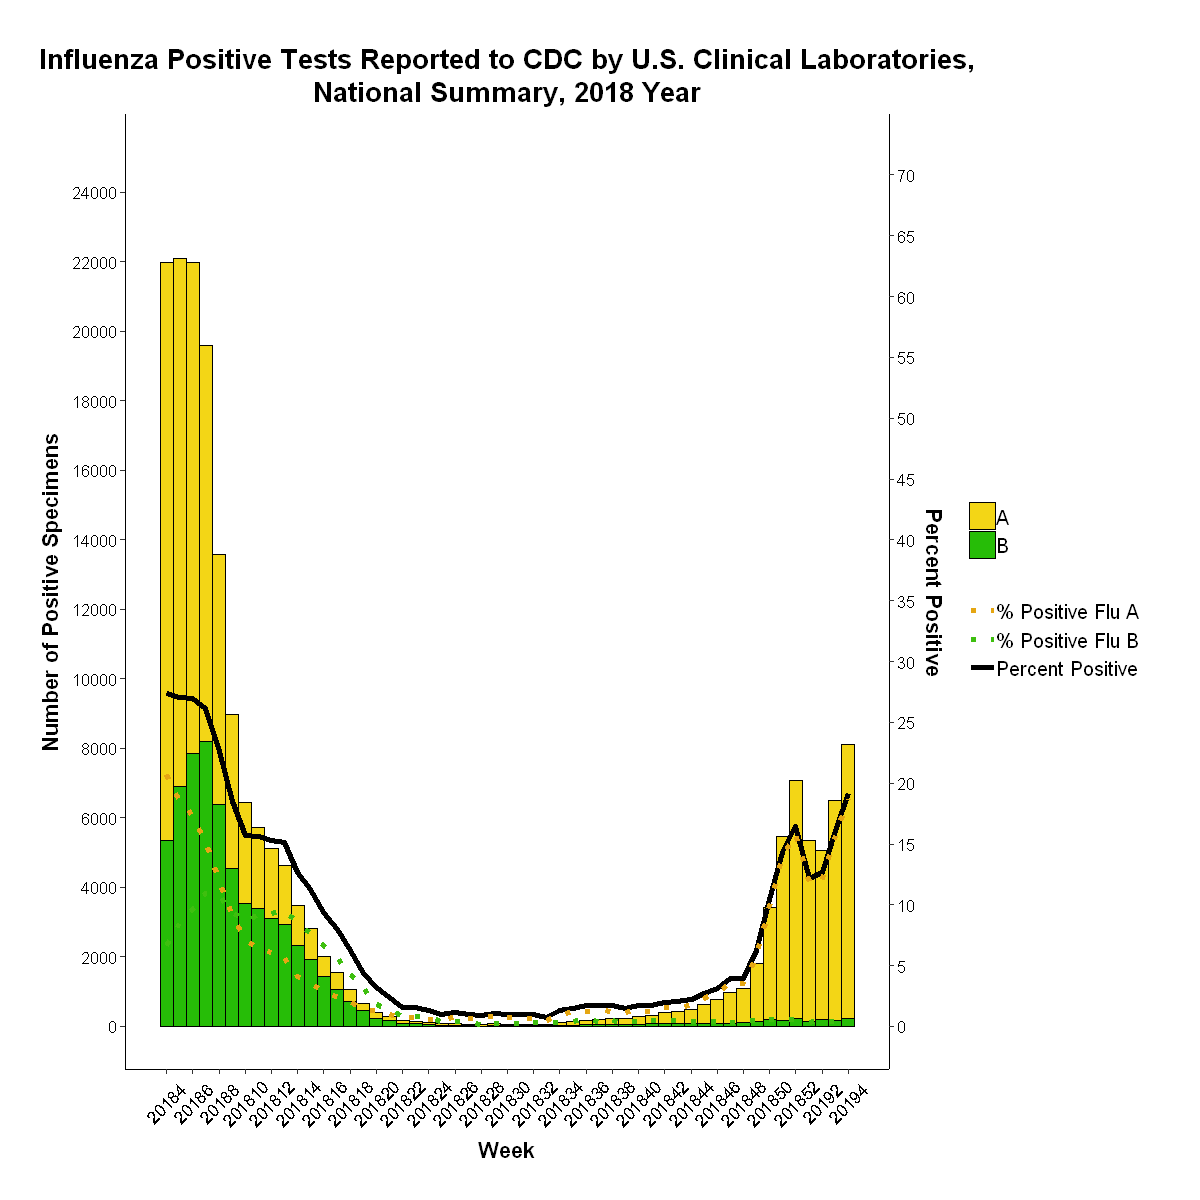

In [6]:
########################### 1.a - Plot the data on positive results by Clinical Data Full Year ###########################################
library(ggplot2)

clinical_year <- read.csv('data/WHO_NREVSS_Clinical_Labs_year.csv', header=TRUE, skip=1)

data_clinical_year <- clinical_year[17:69,3:10]
weeks <- paste(data_clinical_year$YEAR, data_clinical_year$WEEK, sep="")
yr_x <- c(1:length(weeks))
yr_A <- data_clinical_year[,4]
yr_B <- data_clinical_year[,5]

df1 <- data.frame(data_clinical_year)

yr_percent_total <- data_clinical_year[,6]
yr_percent_A <- data_clinical_year[,7]
yr_percent_B <- data_clinical_year[,8]

len_x <- length(weeks)

clin_yr_xaxis <- scale_x_continuous(breaks = seq(1, len_x, by = 2), labels = weeks[c(TRUE,FALSE)])
clin_yr_yaxis <- scale_y_continuous(limits = c(0, 25000), breaks = seq(0,25000, by=2000), sec.axis = sec_axis(trans = ~./350, name = "Percent Positive", breaks = seq(0, 70, by=5)))
clin_yr_plot_theme <- theme(panel.background = element_blank(),
                    plot.margin = unit(c(1,1,1,1), "cm"),
                    plot.title=element_text(size=16, 
                                            face="bold", 
                                            color="black",
                                            hjust=0.5,
                                            lineheight=1.0),  # title
                    plot.subtitle=element_text(size=16, 
                                               color = "black",
                                               face="bold",
                                               hjust=0.5),  # subtitle
                    plot.caption=element_text(size=15),  # caption
                    axis.title.x=element_text(vjust=-1.5,  
                                              size=13, color="black", face="bold"),
                    axis.title.y = element_text(vjust=3, size=13, color="black", face="bold"),
                    axis.title.y.right = element_text(vjust=2, size=13, color="black", face="bold"),
                    axis.text.x = element_text(size=10,
                                               color="black",
                                               angle = 45,
                                               vjust=.5),  # X axis text
                    axis.text.y=element_text(size=10, color="black"),
                    axis.text.y.right=element_text(size=10, color="black"),
                    axis.line = element_line(color="black", size=0.5, linetype = 1),
                    legend.title = element_blank(),
                    legend.key = element_blank(),
                    legend.text = element_text(size=12))  # Y axis text

clinical_year_plot <- ggplot(mapping = aes(x=yr_x)) +  
  geom_bar(aes(y = (yr_A + yr_B), fill = "A"), stat='identity', width=1, color="black") + 
  geom_bar(aes(y = yr_B, fill = "B"), stat='identity', width=1, color="black") + 
  geom_line(aes(y = yr_percent_total*350, color="Percent Positive", group=1), stat='identity', size=1.5) +
  geom_line(aes(y = yr_percent_B*350, color = "% Positive Flu B"), stat="identity", size=1.5, linetype="dotted") + 
  geom_line(aes(y = yr_percent_A*350, color = "% Positive Flu A"), stat="identity", linetype="dotted", size=1.5) + 
  scale_fill_manual(name = "", values=c("A" = '#F3D616', "B" = '#26BD07')) +
  scale_color_manual(name="", values = c( "% Positive Flu B" = '#3EBF0F', "% Positive Flu A" = '#E5A612', "Percent Positive" = "black")) + 
  scale_linetype_manual(values = c(2, 2, 1)) +
  labs(title = "Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,", y = "Number of Positive Specimens", x = "Week", subtitle = "National Summary, 2018 Year") +
  clin_yr_xaxis + clin_yr_yaxis + clin_yr_plot_theme +
  guides(fill=guide_legend(order=1), 
         color=guide_legend(order=2, override.aes=list(linetype=c("dotted", "dotted", "solid"))))

# png('1a.Clinical_Year_2018_19.png')
clinical_year_plot
ggsave("1a.Clinical_Year_2018_19.png", plot = clinical_year_plot, dpi=300, width = 30, height = 20, units="cm")
# dev.off()


#  Analysis - Influenza Positive Test for Week 4, 2018 - Week 4, 2019, Year Long for New York State Reported by Clinical Labs 

Similar to the previous two graphs, we extracted the data from the relevant CSV file, and plotted it for the New York State

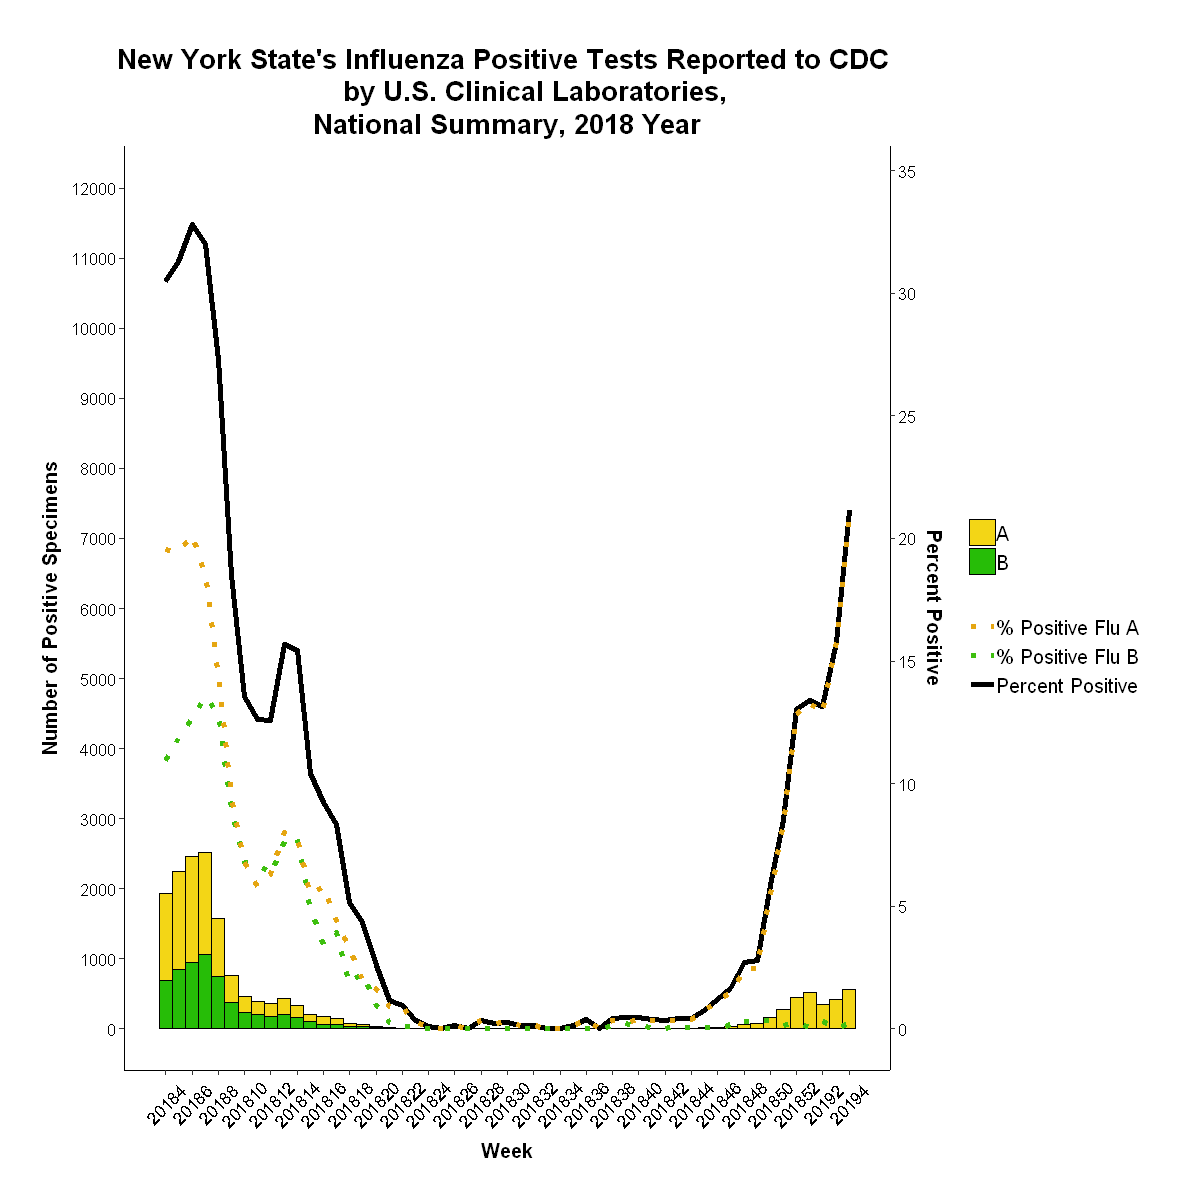

In [7]:
########################### 1.b - Plot the data on positive results by Clinical Data Full Year - New York State ###########################################
library(ggplot2)

NY_clinical_year <- read.csv('data/WHO_NREVSS_Clinical_Labs_NY.csv', header=TRUE, skip=1)

data_NY <- NY_clinical_year[17:69,3:ncol(NY_clinical_year)]

NY_weeks <- paste(data_NY$YEAR, data_NY$WEEK, sep="")
NY_x <- c(1:length(NY_weeks))
NY_A <- data_NY[,4]
NY_B <- data_NY[,5]

df_NY <- data.frame(data_NY)

NY_percent_total <- data_NY[,6]
NY_percent_A <- data_NY[,7]
NY_percent_B <- data_NY[,8]


NY_xaxis <- scale_x_continuous(breaks = seq(1, length(NY_weeks), by = 2), labels = NY_weeks[c(TRUE, FALSE)])
NY_yaxis <- scale_y_continuous(limits = c(0, 12000), breaks = seq(0,12000, by=1000), sec.axis = sec_axis(trans = ~./350, name = "Percent Positive", breaks = seq(0, 35, by=5)))
NY_plot_theme <- theme(panel.background = element_blank(),
                    plot.margin = unit(c(1,1,1,1), "cm"),
                    plot.title=element_text(size=16, 
                                            face="bold", 
                                            color="black",
                                            hjust=0.5,
                                            lineheight=1.0),  # title
                    plot.subtitle=element_text(size=16, 
                                               color = "black",
                                               face="bold",
                                               hjust=0.5),  # subtitle
                    plot.caption=element_text(size=15),  # caption
                    axis.title.x=element_text(vjust=-1.5,  
                                              size=12, color="black", face="bold"),
                    axis.title.y = element_text(vjust=3, size=12, color="black", face="bold"),
                    axis.title.y.right = element_text(vjust=2, size=12, color="black", face="bold"),
                    axis.text.x = element_text(size=10,
                                               color="black",
                                               angle = 45,
                                               vjust=.5),  # X axis text
                    axis.text.y=element_text(size=10, color="black"),
                    axis.text.y.right=element_text(size=10, color="black"),
                    axis.line = element_line(color="black", size=0.5, linetype = 1),
                    legend.title = element_blank(),
                    legend.key = element_blank(),
                    legend.text = element_text(size=12))  # Y axis text

NY_clinical_year_plot <- ggplot(df_NY, mapping = aes(x=NY_x)) +  
  geom_bar(aes(y = (NY_A + NY_B), fill = "A"), stat='identity', width=1, color="black") + 
  geom_bar(aes(y = NY_B, fill = "B"), stat='identity', width=1, color="black") + 
  geom_line(aes(y = NY_percent_total*350, color="Percent Positive", group=1), stat='identity', size=1.5) +
  geom_line(aes(y = NY_percent_B*350, color = "% Positive Flu B"), stat="identity", size=1.5, linetype="dotted") + 
  geom_line(aes(y = NY_percent_A*350, color = "% Positive Flu A"), stat="identity", linetype="dotted", size=1.5) + 
  scale_fill_manual(name = "", values=c("A" = '#F3D616', "B" = '#26BD07')) +
  scale_color_manual(name="", values = c( "% Positive Flu B" = '#3EBF0F', "% Positive Flu A" = '#E5A612', "Percent Positive" = "black")) + 
  scale_linetype_manual(values = c(2, 2, 1)) +
  labs(title = "New York State's Influenza Positive Tests Reported to CDC 
       by U.S. Clinical Laboratories,", y = "Number of Positive Specimens", x = "Week", subtitle = "National Summary, 2018 Year") +
  NY_xaxis + NY_yaxis + NY_plot_theme +
  guides(fill=guide_legend(order=1), 
         color=guide_legend(order=2, override.aes=list(linetype=c("dotted", "dotted", "solid"))))

# png('1b.NewYork_Clinical_Year_2018_19.png')
NY_clinical_year_plot
ggsave("1b.NY_clinical_Year_2018_19.png", plot = NY_clinical_year_plot, dpi=300, width = 30, height = 20, units="cm")
# dev.off()

 # Analysis - Public Health Labs Report of Positive Influenza, 2018-2019 Season
 
 For this graph, we have used normal barplot techniques in R. We first started working with ggplot and geom_bar for this graph, however my graph didn't turn out correctly. Previously, we had already done the plotting using R barplot and so used that for this graph. 
 
 First, the data for all the 7 fields of different types of tests was extracted with the corresponding weeks and converted into a dataframe. This dataframe was used for plotting in barplot using the respective colors. 
 The data was played with and made useful for plotting with the correct labels on both x and y axis, such that it matches the graph on the CDC's website. 

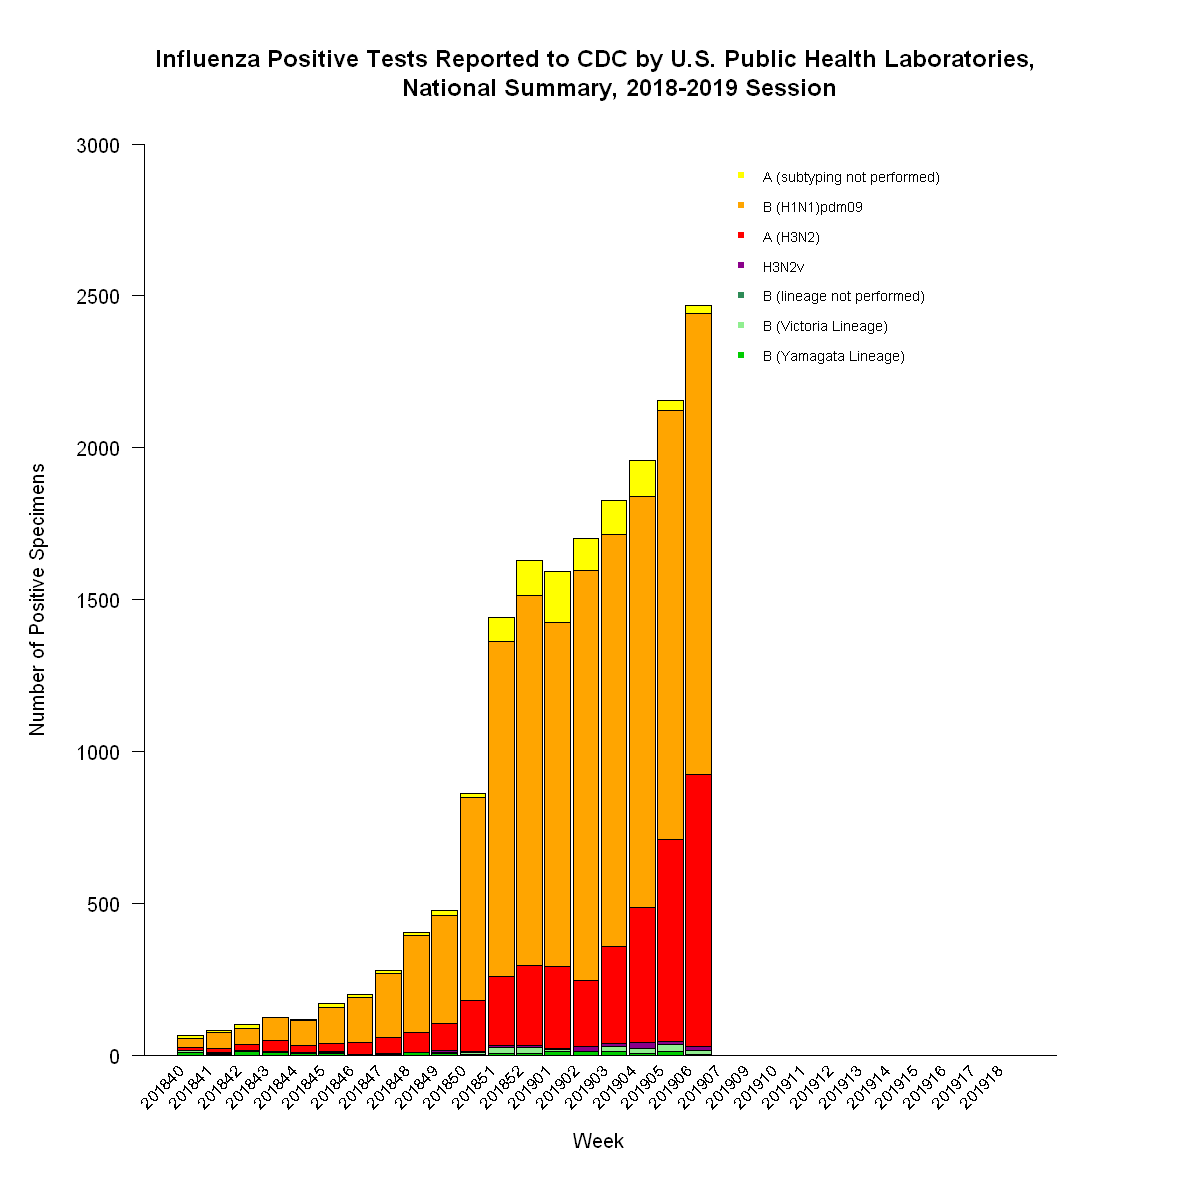

In [8]:
########################### 2 - Plot the data on positive results by Public Health ###########################################
######## Commented code below was the first attempt, that didn't work properly ####################################
# library(ggplot2)
# library(reshape2)
# library(extrafont)
# loadfonts(device="win")
# 
# publicHealth <- read.csv("data/WHO_NREVSS_Public_Health_Labs.csv", skip=1, header=TRUE)
# year_PH <- read.csv("data/WHO_NREVSS_Public_Health_Labs_year.csv", skip=1, header=TRUE)
# 
# data_ph <- publicHealth[,3:ncol(publicHealth)]
# year_data_ph <- year_PH[,3:ncol(year_PH)]
# 
# WEEK <- paste(data_ph$YEAR, data_ph$WEEK, sep="")
# weeks <- paste(year_data_ph$YEAR, year_data_ph$WEEK, sep="")
# 
# ph_x <- c(1:length(WEEK))
# x_year <- c(1:length(weeks))
# 
# len_x <- length(WEEK)
# len_x_year <- length(weeks)
# 
# #df2 <- data_ph[,3:ncol(data_ph)]
# #df2 <- df2[, c(1,7,6,5,8,3,2,4)]
# df <- data.frame(data_ph$A..Subtyping.not.Performed.,
#                   data_ph$A..2009.H1N1.,
#                   data_ph$A..H3.,
#                   data_ph$H3N2v,
#                  data_ph$B,
#                  data_ph$BVic,
#                  data_ph$BYam)
# 
# #df3 <- melt(df, id.vars = 'x')
# 
# PH_xaxis <- scale_x_continuous(breaks = seq(1, len_x, by = 2), labels = WEEK[c(TRUE, FALSE)])
# PH_yaxis <- scale_y_continuous(limits = c(0, 3500), breaks = seq(0,3500, by=500))
# PH_plot_theme <- theme(panel.background = element_blank(),
#                     plot.margin = unit(c(1,1,1,1), "cm"),
#                     plot.title=element_text(size=16, 
#                                             face="bold", 
#                                             color="black",
#                                             hjust=0.5,
#                                             lineheight=1.0),  # title
#                     plot.subtitle=element_text(size=16, 
#                                                color = "black",
#                                                face="bold",
#                                                hjust=0.5),  # subtitle
#                     plot.caption=element_text(size=15),  # caption
#                     axis.title.x=element_text(vjust=-1.5,  
#                                               size=13, color="black", face="bold"),
#                     axis.title.y = element_text(vjust=3, size=13, color="black", face="bold"),
#                     axis.text.x = element_text(size=10,
#                                                color="black",
#                                                angle = 45,
#                                                vjust=.5),  # X axis text
#                     axis.text.y=element_text(size=10, color="black"),
#                     axis.line = element_line(color="black", size=0.5, linetype = 1),
#                     legend.title = element_blank(),
#                     legend.key = element_blank(),
#                     legend.text = element_text(size=9))  # Y axis text
# 
# ph_plot <- ggplot(mapping = aes(x=ph_x)) + #geom_bar(stat='identity', color="black", width=0.8) + 
#   geom_bar(aes(y = data_ph$A..Subtyping.not.Performed., fill = "A (subtyping not performed)"), stat='identity', width=1, color="black") + 
#   geom_bar(aes(y = data_ph$A..2009.H1N1., fill = "A (H1N1)pdm09"), stat='identity', width=1, color="black") + 
#   geom_bar(aes(y = data_ph$A..H3., fill = "A (H3N2)"), stat='identity', width=1, color="black") +
#   geom_bar(aes(y = data_ph$H3N2v, fill = "H3N2v"), stat='identity', width=1, color="black") + 
#   geom_bar(aes(y = data_ph$B, fill = "B (lineage not performed)"), stat='identity', width=1, color="black") + 
#   geom_bar(aes(y = data_ph$BVic, fill = "B (Victoria Lineage)"), stat='identity', width=1, color="black") + 
#   geom_bar(aes(y = data_ph$BYam, fill = "B (Yamagata Lineage)"), stat='identity', width=1, color="black") + 
#   scale_fill_manual(name = "", values=c( 
#                                         "A (H1N1)pdm09" = '#EF941D',
#                                         "A (subtyping not performed)" = '#F9E10E',
#                                         "A (H3N2)" = '#EF471D',
#                                         "H3N2v" = '#CC1DEF',
#                                         "B (lineage not performed)" = '#099116',
#                                         "B (Victoria Lineage)" = '#72F53A',
#                                         "B (Yamagata Lineage)" = '#42C30B')) +
#   labs(title = "Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,
#        National Summary, 2018 - 2019 Season", 
#        y = "Number of Positive Specimens", x = "Week", 
#        subtitle = "") + 
#   PH_xaxis + PH_yaxis + PH_plot_theme
#   #guides(fill=guide_legend(order=1), 
#    #      color=guide_legend(order=2, override.aes=list(linetype=c("dotted", "dotted", "solid"))))
# 
# ph_plot
# 
# 

# Following code works for this problem 
publicHealth <- read.csv("data/WHO_NREVSS_Public_Health_Labs.csv", header=T, skip=1)
year_PH <- read.csv("data/WHO_NREVSS_Public_Health_Labs_year.csv", skip=1, header=TRUE)

positive_ph <- publicHealth[,4:12]
positive_ph[,2] <- NULL
positive_ph <- positive_ph[, c(1,7,6,5,8,3,2,4)]
positive_ph[1:13,1] <- positive_ph[1:13,1] + 201800
positive_ph[14:nrow(positive_ph),1] <- positive_ph[14:nrow(positive_ph),1] + 201900
pubhlth <- t(as.matrix(positive_ph[-1]))
colnames(pubhlth) <- positive_ph$WEEK


yr_positive_ph <- year_PH[16:68,4:12]
yr_positive_ph[,2] <- NULL
yr_positive_ph <- yr_positive_ph[, c(1,7,6,5,8,3,2,4)]
yr_positive_ph[1:13,1] <- yr_positive_ph[1:13,1] + 201800
yr_positive_ph[14:nrow(yr_positive_ph),1] <- yr_positive_ph[14:nrow(yr_positive_ph),1] + 201900
yr_pubhlth <- t(as.matrix(yr_positive_ph[-1]))
colnames(yr_pubhlth) <- yr_positive_ph$WEEK

# png('2.PublicHealth_CDCWebsite.png', width=800, height=600)
par(mar=c(6,6,6,6))
ph_pts <- barplot(pubhlth, xlab='Week', beside=FALSE, space = 0.1, 
                  col = c("green3", "lightgreen", "magenta4", "navy", "red", "orange", "yellow", "seagreen"), 
                  xaxt="n", yaxt="n", ylim = c(0,3000))
axis(2, at=seq(0,3000,500), las=1)
axis(1, at=c(-20:2000), lwd.ticks=0, labels=FALSE)
mtext("Number of Positive Specimens", side=2, line=4)
text(x=ph_pts, y=-2, positive_ph[,1], cex=0.8, srt=45, xpd=TRUE, adj=1.27) # Display x-labels in a rotated manner
title(main='Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, 
      National Summary, 2018-2019 Session')
legend("topright",inset=0.002, legend=c("A (subtyping not performed)","B (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)"), pch = c(15, 15, 15, 15, 15, 15, 15),
       col=c("yellow","orange", "red", "magenta4", "seagreen", "lightgreen", "green3"),cex=0.7, box.lty=0)
# dev.off()


# Analysis - Public Health Labs Report of Positive Influenza, Week 4, 2018 - Week 4, 2019 Year

This graph is a year long representation of the Positive Influenza reports by Public Health Labs. The data was downloaded and
extracted only from Week 4 of 2018 to Week 4 of 2019. 

Plotting was done in the exact same way as the previous graph. 

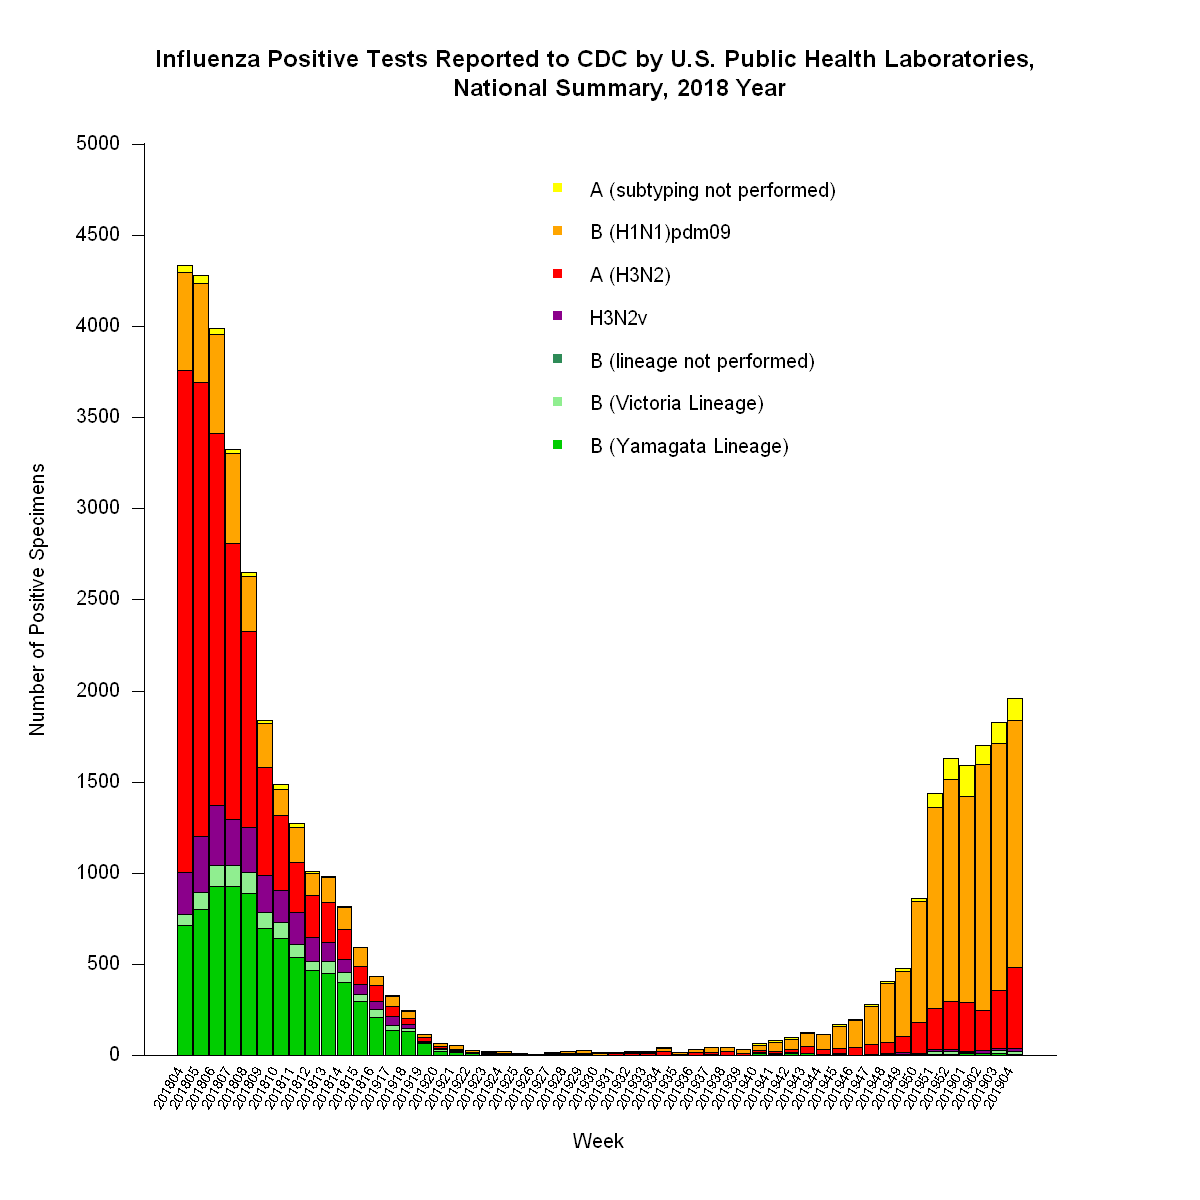

In [9]:
########################### 2.b - Plot the data on positive results by Public Health Full Year - 2018 ###########################################
# png('2b.PublicHealth_Year_2018_19.png', width=800, height=600)
par(mar=c(6,6,6,6))
yr_ph_pts <- barplot(yr_pubhlth, xlab='Week', beside=FALSE, space = 0.1, 
                  col = c("green3", "lightgreen", "magenta4", "navy", "red", "orange", "yellow", "seagreen"), 
                  xaxt="n", yaxt="n", ylim = c(0,5000))
axis(2, at=seq(0,10000,500), las=1)
axis(1, at=c(-20:2000), lwd.ticks=0, labels=FALSE)
mtext("Number of Positive Specimens", side=2, line=4)
text(x=yr_ph_pts, y=-2, yr_positive_ph[,1], cex=0.7, srt=60, xpd=TRUE, adj=1.27)
title(main='Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, 
      National Summary, 2018 Year')
legend("topright",inset=0.0015, legend=c("A (subtyping not performed)","B (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)"), pch = c(15, 15, 15, 15, 15, 15, 15),
       col=c("yellow","orange", "red", "magenta4", "seagreen", "lightgreen", "green3"),cex=1, box.lty=0)
# dev.off()



# Analysis - Influenza Related Pediatric Deaths from 2015 to present. 

For this graph, two fields, Previous Week Deaths and Current Week Deaths, were plotted against the Weeks of every year. 
The x-axis has every 6 weeks shown on its labels. 

Plotting was done using basic ggplot() and geom_bar() for the barplot representation of the data. 

The text above every set of graphs was added using the "annotate" function in conjunction with ggplot()

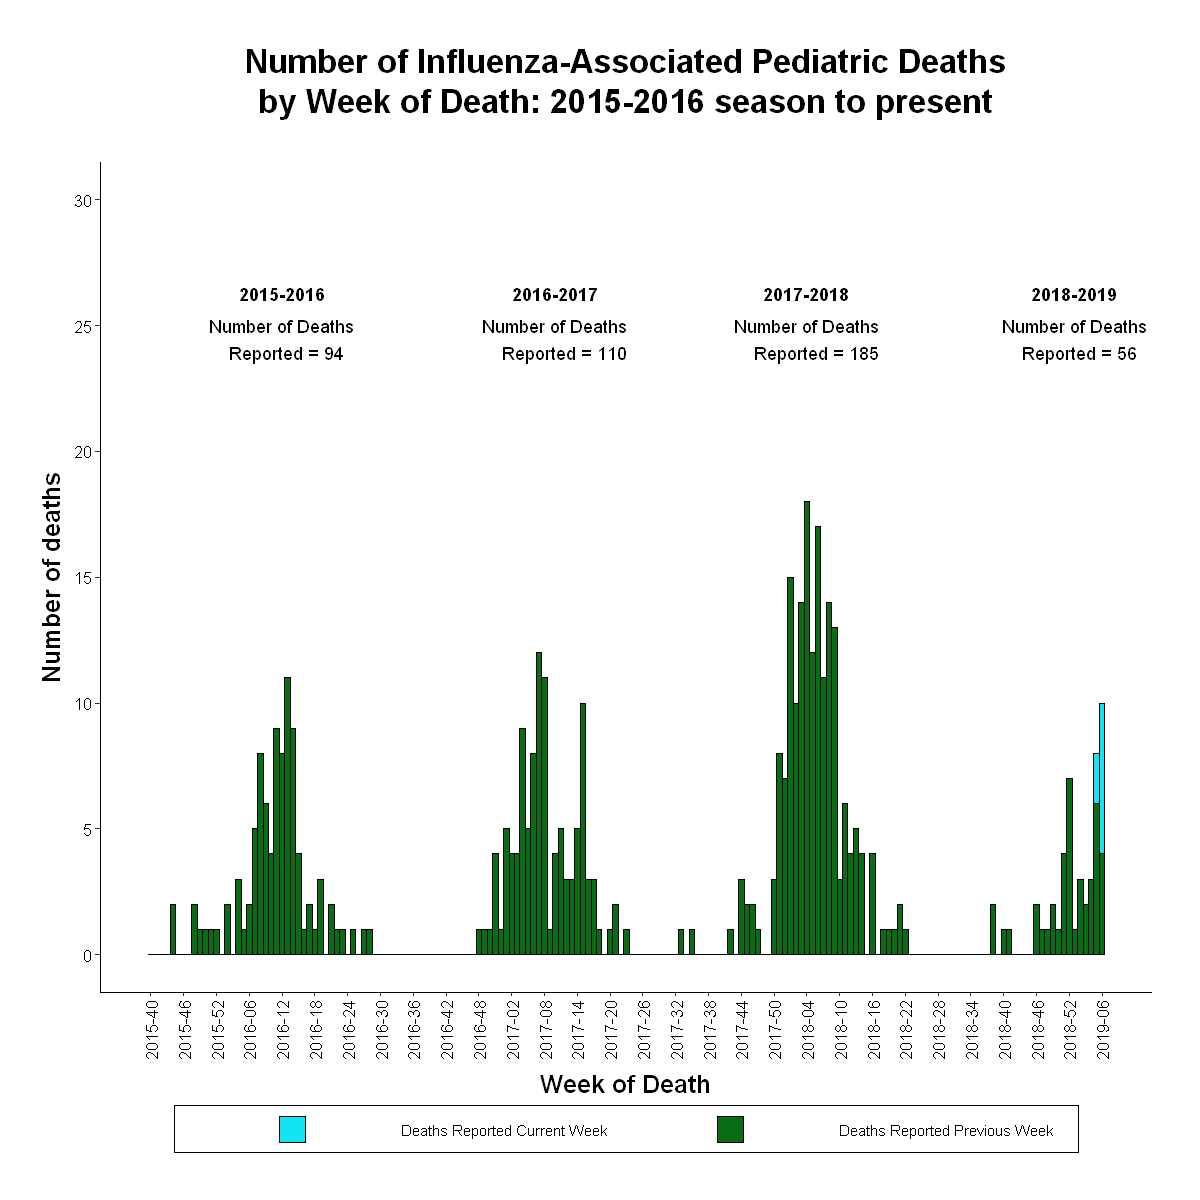

In [10]:
########################### 3 - Plot the Pediatric Deaths ###########################################
library(ggplot2)

pediatric <- read.csv("data/Weekly.csv", header=TRUE, skip = 1)
previous <- pediatric[54:228,4]
current <- pediatric[54:228,5]
all_weeks <- as.character(pediatric[54:228,2])
ped_x <- c(1:length(all_weeks))

ped_weeks <- all_weeks[seq(1, length(all_weeks), 6)]  # Select every 6 elements from the weeks for x-label

PED_xaxis <- scale_x_continuous(breaks = seq(1, length(ped_x), by = 6), labels = ped_weeks)
PED_yaxis <- scale_y_continuous(limits = c(0, 30), breaks = seq(0,30, by=5))
PED_plot_theme <- theme(panel.background = element_blank(),
                    plot.margin = unit(c(1,1,1,1), "cm"),
                    plot.title=element_text(size=20, 
                                            face="bold", 
                                            color="black",
                                            hjust=0.5,
                                            lineheight=1.0),  # title
                    plot.subtitle=element_text(size=20, 
                                               color = "black",
                                               face="bold",
                                               hjust=0.5),  # subtitle
                    plot.caption=element_text(size=15),  # caption
                    axis.title.x=element_text(vjust=-1.5,  
                                              size=15, color="black", face="bold"),
                    axis.title.y = element_text(vjust=3, size=15, color="black", face="bold"),
                    axis.text.x = element_text(size=10,
                                               color="black",
                                               angle = 90,
                                               vjust=.5),  # X axis text
                    axis.text.y=element_text(size=10, color="black"),
                    axis.line = element_line(color="black", size=0.5, linetype = 1),
                    legend.title = element_blank(),
                    legend.background = element_blank(),
                    legend.position = "bottom",
                    legend.justification = "center",
                    legend.spacing.x = unit(2.0,'cm'),
                    #legend.text = element_text(margin=margin(t=1)),
                    legend.box.background = element_rect(color="black"),
                    legend.key = element_blank(),
                    legend.text = element_text(size=9))  # Y axis text

ped_plot <- ggplot(mapping = aes(x=ped_x)) + 
  #geom_bar(aes(y = (previous + current), fill = "Deaths Reported Previous Week"), stat='identity', width=1, color="black") + #, position = 'dodge') + 
  geom_bar(aes(y = (previous+current), fill = "Deaths Reported Current Week"), stat='identity', width=1, color="black") + #, position = 'dodge') + 
  geom_bar(aes(y = previous, fill = "Deaths Reported Previous Week"), stat='identity', width=1, color="black", position = 'dodge') + 
  scale_fill_manual(name = "", 
                    values=c( 
                            "Deaths Reported Previous Week" = '#0A6C13',
                            "Deaths Reported Current Week" = '#13E3F2')) +
  labs(title = "Number of Influenza-Associated Pediatric Deaths
by Week of Death: 2015-2016 season to present", 
       y = "Number of deaths", x = "Week of Death", 
       subtitle = "") + 
  PED_xaxis + PED_yaxis + PED_plot_theme +
  annotate("text", x=25, y=24.5, label='atop(bold("2015-2016\n"), "\n\nNumber of Deaths\n    Reported = 94")', parse=TRUE) +
  annotate("text", x=75, y=24.5, label='atop(bold("2016-2017\n"), "\n\nNumber of Deaths\n    Reported = 110")', parse=TRUE) +
  annotate("text", x=121, y=24.5, label='atop(bold("2017-2018\n"), "\n\nNumber of Deaths\n    Reported = 185")', parse=TRUE) +
  annotate("text", x=170, y=24.5, label='atop(bold("2018-2019\n"), "\n\nNumber of Deaths\n    Reported = 56")', parse=TRUE) +
  guides(fill=guide_legend(label.position = "right"))

# png('3.PediatricDeaths.png')
ped_plot
ggsave("3.PediatricDeaths.png", plot = ped_plot, dpi=300, width = 30, height = 20, units="cm")
# dev.off()



# Analysis - Percentage Visits for Influenza Like Illness

For this graph, the data was downloaded starting from the year 2009 until the Week 4 of 2019 for representation. 
The data was extracted for every year, i.e. 2009-2010, 2011-2012, 2014-2015, 2015-2016, 2016-2017, 2017-2018, 2018-2019
as records of 52 weeks each for every year period. Later, the % visits were plotted for every year period using different colors.
    
The National Baseline is represented using a dotted line at 2.2%. 

We implemented this graph using two methods - ggplot(), geom_line() and normal R plots with par(new=TRUE).

According to us, we were more satisfied with the results of the latter method, i.e the basic plot methods of R with par(new=TRUE). 

Both graphs have been shown below. 

# ILI - Graph using ggplot() and geom_line()
Method 1 for ILI - ggplot()

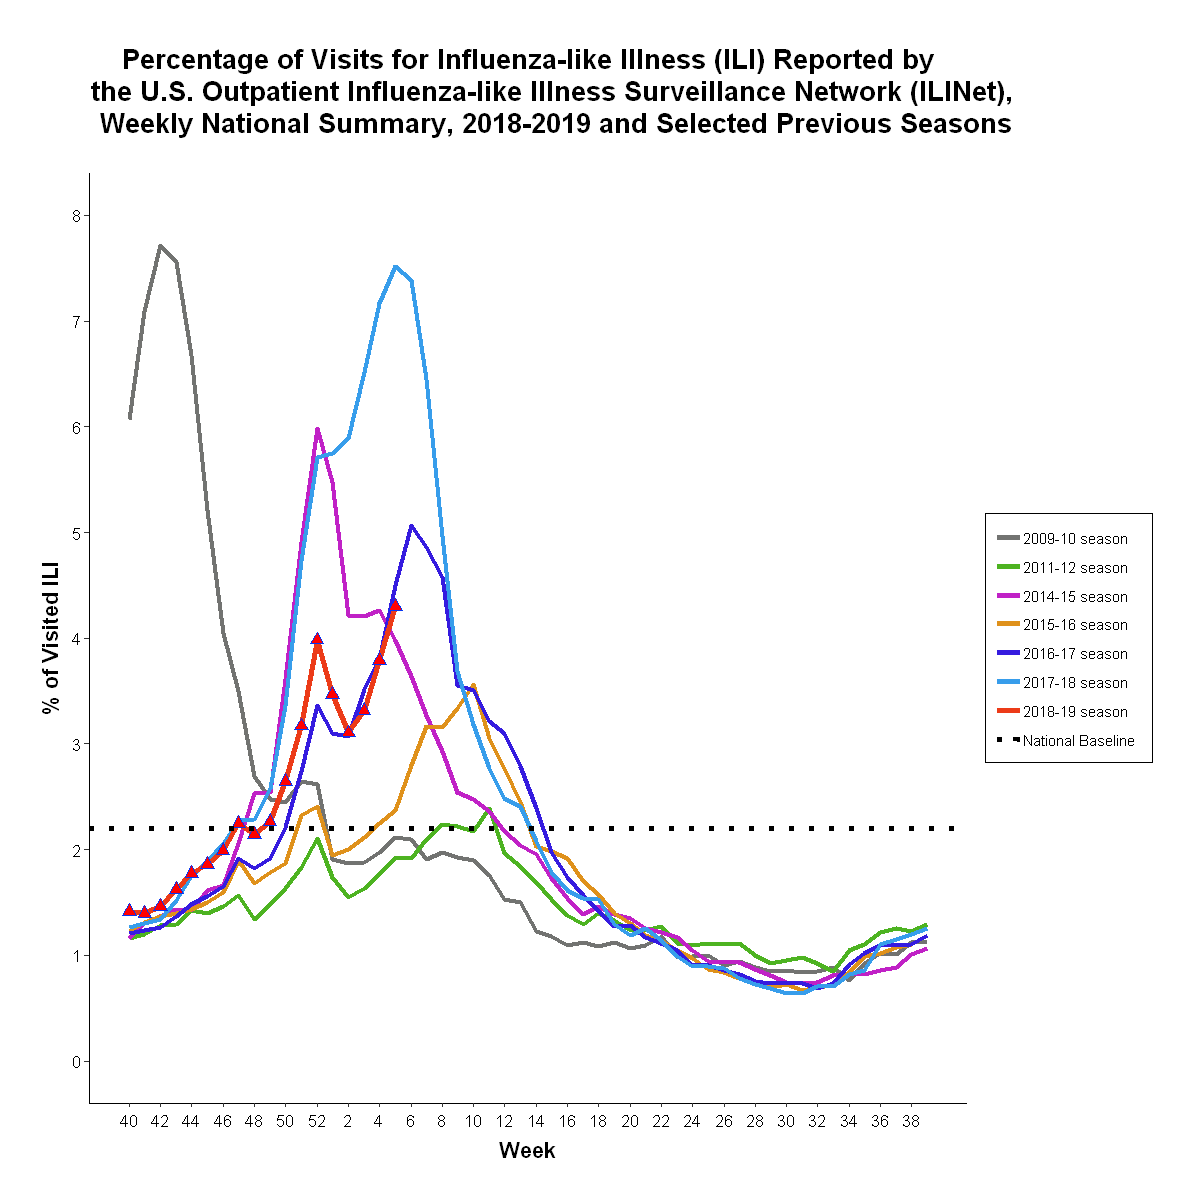

In [11]:
########################### 4 - Plot the data on Influenza Like Illness (ILI) ###########################################
library(ggplot2)

################## Using ggplot2 - Following code is version 1.0 of implementing ILI graph #####################################
ILI <- read.csv("data/ILINet.csv", skip=1, header=TRUE)
n_weeks <- c(1:52)

df_ili <- data.frame(ILI)
week_ILI <- as.character(ILI[6:57, 4])
visited_09_10 <- ILI[6:57, 5]
visited_11_12 <- ILI[110:161, 5]
visited_14_15 <- ILI[266:317, 5]
visited_15_16 <- ILI[319:370, 5]
visited_16_17 <- ILI[371:422, 5]
visited_17_18 <- ILI[423:474, 5]
visited_18_19 <- ILI[475:492, 5]


ILI_x <- scale_x_continuous(breaks = seq(1, length(n_weeks), by = 2), labels = week_ILI[c(TRUE, FALSE)])
ILI_y <- scale_y_continuous(limits = c(0, 8.0), breaks = seq(0,8.0, by=1.0))
ILI_plot_theme <- theme(panel.background = element_blank(),
                    plot.margin = unit(c(1,1,1,1), "cm"),
                    plot.title=element_text(size=16, 
                                            face="bold", 
                                            color="black",
                                            hjust=0.5,
                                            lineheight=1.0),  # title
                    plot.subtitle=element_text(size=12, 
                                               color = "black",
                                               face="bold",
                                               hjust=0.5),  # subtitle
                    plot.caption=element_text(size=15),  # caption
                    axis.title.x=element_text(vjust=-1.5, face="bold",  
                                              size=13, color="black"),
                    axis.title.y = element_text(vjust=3, face="bold", size=13, color="black"),
                    axis.text.x = element_text(size=10,
                                               color="black",
                                               vjust=.5),  # X axis text
                    axis.text.y=element_text(size=10, color="black"),
                    axis.line = element_line(color="black", size=0.5, linetype = 1),
                    legend.title = element_blank(),
                    legend.key = element_blank(),
                    legend.background = element_blank(),
                    legend.box.background = element_rect(color="black"),
                    legend.text = element_text(size=9))  # Y axis text


ili_plot <- ggplot(mapping = aes(x=n_weeks)) + 
  geom_line(aes(y = visited_09_10, color="2009-10 season"), stat='identity', size=1.2) + 
  geom_line(aes(y = visited_11_12, color="2011-12 season"), stat='identity', size=1.2) + 
  geom_line(aes(y = visited_14_15, color="2014-15 season"), stat='identity', size=1.2) + 
  geom_line(aes(y = visited_15_16, color="2015-16 season"), stat='identity', size=1.2) + 
  geom_line(aes(y = visited_16_17, color="2016-17 season"), stat='identity', size=1.2) + 
  geom_line(aes(y = visited_17_18, color="2017-18 season"), stat='identity', size=1.2) + 
  geom_line(aes(x = n_weeks[1:18], y = visited_18_19, color="2018-19 season"), stat='identity', size=1.5) +
  geom_point(aes(x=n_weeks[1:18], y=visited_18_19, color="triangle"), shape=24, size=2.5, fill="red", color="#0736F2")+
  geom_hline(aes(yintercept=2.2, color="National Baseline"), linetype="dotted", size=1.5) +
  scale_color_manual(name="", 
                     values = c( "2009-10 season" = '#727371', 
                                 "2011-12 season" = '#4DB321', 
                                 "2014-15 season" = '#C021C6',
                                 "2015-16 season" = '#DF911B',
                                 "2016-17 season" = '#351BDF',
                                 "2017-18 season" = '#379DEB',
                                 "2018-19 season" = '#EC3B18',
                                 "National Baseline" = 'black')) + 
  scale_linetype_manual(values = c("2009-10 season" = 1, 
                                   "2011-12 season" = 1, 
                                   "2014-15 season" = 1, 
                                   "2015-16 season" = 1, 
                                   "2016-17 season" = 1, 
                                   "2017-18 season" = 1, 
                                   "2018-19 season" = 1, 
                                   "National Baseline" = 2)) + 
  labs(title = "Percentage of Visits for Influenza-like Illness (ILI) Reported by
       the U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet), 
       Weekly National Summary, 2018-2019 and Selected Previous Seasons", 
       y = "% of Visited ILI", x = "Week", 
       subtitle = "") + 
  ILI_x + ILI_y + ILI_plot_theme +
  guides(color=guide_legend(override.aes=list(linetype=c("solid", "solid", "solid", "solid", "solid", "solid", "solid", "dotted"), 
                                              shape = c(NA, NA, NA, NA, NA, NA, 24, NA))))
# png('4.InfluenzaLikeIllness_ggplot.png')
ili_plot
ggsave("4.InfluenzaLikeIllness_ggplot.png", plot = ili_plot, dpi=300, width = 30, height = 20, units="cm")
# dev.off()

# ILI - Graph using plot in R
Method 2 for ILI - R plots. 

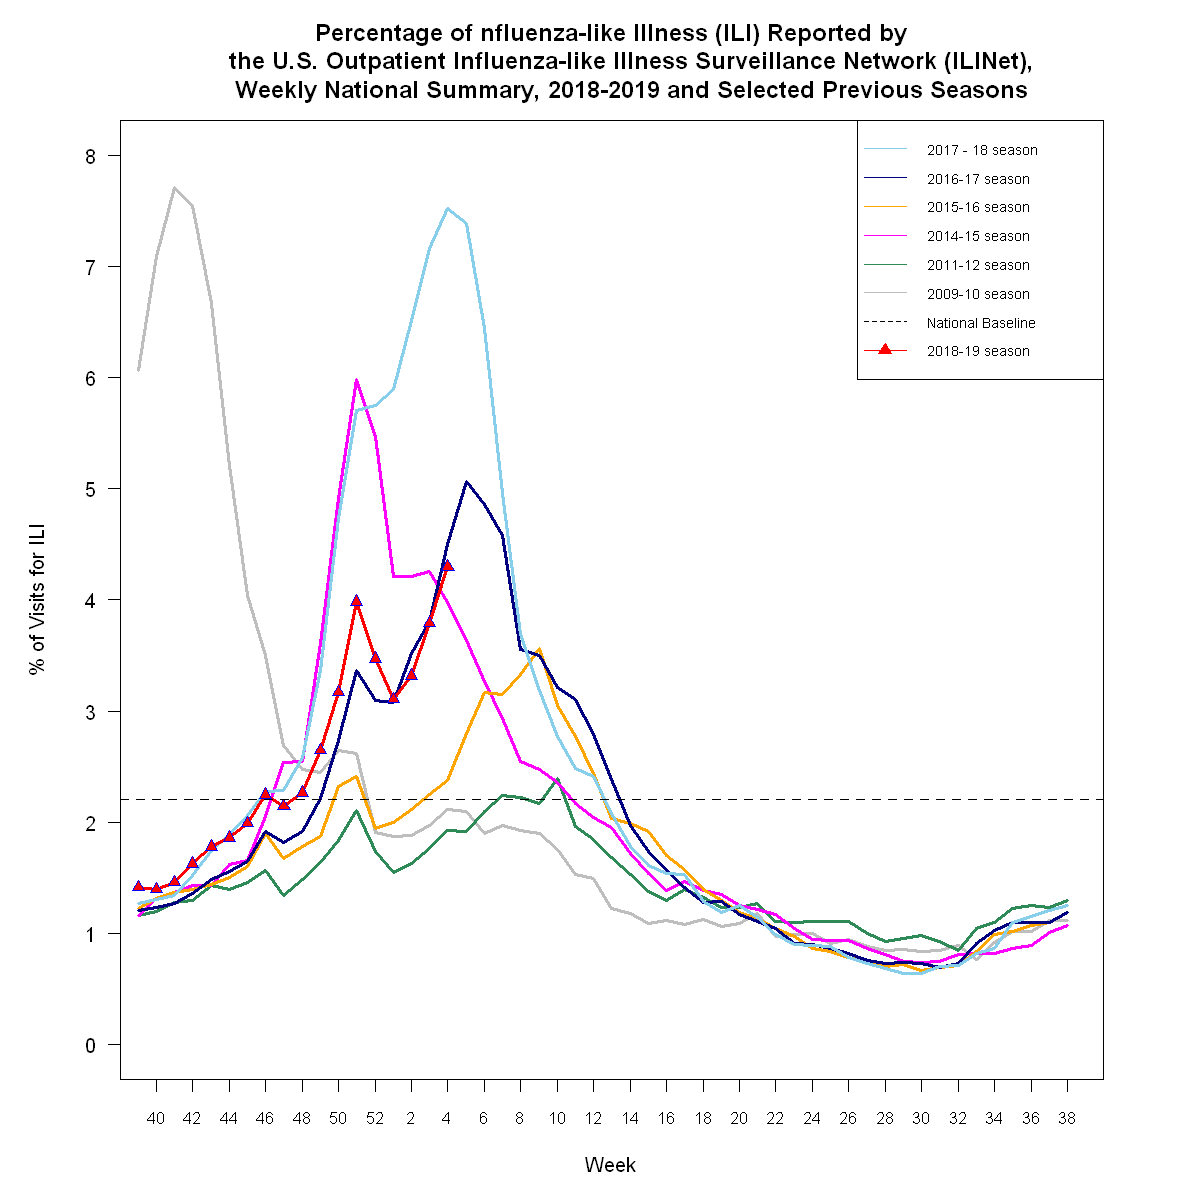

In [12]:
################# Using normal R plot functions - Following code is version 2.0 of implementing ILI graph #####################################
ILI <- read.csv("data/ILINet.csv", skip=1, header=TRUE)
n_weeks <- c(1:52)

visited_09_10 <- t(data.frame(ILI[6:57, 5]))
visited_11_12 <- t(data.frame(ILI[110:161, 5]))
visited_14_15 <- t(data.frame(ILI[266:317, 5]))
visited_15_16 <- t(data.frame(ILI[319:370, 5]))
visited_16_17 <- t(data.frame(ILI[371:422, 5]))
visited_17_18 <- t(data.frame(ILI[423:474, 5]))
visited_18_19 <- t(data.frame(ILI[475:492, 5]))

#png('4.InfluenzaLikeIllness_normalBarplot_R.png', width=800, height=600)
par(mar=c(5,5,5,4))
plot(x=n_weeks, y=visited_09_10, type="l", ylim=c(0.0,8.0), yaxt="n", xlab = "", ylab ="", xaxt="n", xlim = c(2,52), col="gray", lwd=2.5)
axis(2, at=seq(0.0,8.0,1.0), las=1)
x_labels <- c(40, 42, 44, 46, 48, 50, 52, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38)
axis(1, at = seq(2, 52, 2), las=0, labels = x_labels, cex.axis=0.8)
mtext("% of Visits for ILI", side=2, line=3)
mtext("Week", side=1, line=3)
par(new=TRUE)
plot(x=n_weeks, y=visited_11_12, type="l", ylim=c(0.0,8.0), yaxt="n", xaxt="n", xlab = "", ylab = "", xlim = c(2,52), col="seagreen", lwd=2.5)
par(new=TRUE)
plot(x=n_weeks, y=visited_14_15, type="l", ylim=c(0.0,8.0), yaxt="n", xaxt="n", xlab = "", ylab = "", xlim = c(2,52), col="magenta", lwd=2.5)
par(new=TRUE)
plot(x=n_weeks, y=visited_15_16, type="l", ylim=c(0.0,8.0), yaxt="n", xaxt="n", xlab = "", ylab = "", xlim = c(2,52), col="orange", lwd=2.5)
par(new=TRUE)
plot(x=n_weeks, y=visited_16_17, type="l", ylim=c(0.0,8.0), yaxt="n", xaxt="n", xlab = "", ylab = "", xlim = c(2,52), col="navy", lwd=2.5)
par(new=TRUE)
plot(x=n_weeks, y=visited_17_18, type="l", ylim=c(0.0,8.0), yaxt="n", xaxt="n", xlab = "", ylab = "", xlim = c(2,52), col="skyblue", lwd=2.5)
par(new=TRUE)
plot(x=n_weeks[1:18], y=visited_18_19, type="l",  ylim=c(0.0,8.0), yaxt="n", xaxt="n", xlab = "", ylab = "", xlim = c(2,52), col="red", lwd=2.5)
points(x=n_weeks[1:18], y=visited_18_19, type="p", pch=24, col="blue", bg="red")
par(new=TRUE)
clip(x1=0, x2=54, y1=2.2, y2=2.2)
abline(h=2.2, lty=2, lwd=2)

title(main='Percentage of nfluenza-like Illness (ILI) Reported by
      the U.S. Outpatient Influenza-like Illness Surveillance Network (ILINet),
      Weekly National Summary, 2018-2019 and Selected Previous Seasons')

legend_labels <- c("2017 - 18 season", "2016-17 season", "2015-16 season", "2014-15 season", "2011-12 season", "2009-10 season", "National Baseline", "2018-19 season")
legend_cols <- c("skyblue", "navy", "orange", "magenta", "seagreen", "gray", "black", "red")
legend("topright", legend = legend_labels, pch = c(NA, NA, NA, NA, NA, NA, NA, 17), lty = c(1, 1, 1, 1, 1, 1, 2, 1), lwd=1.5, border="black",
       pt.cex=1.2, col=legend_cols, cex=0.7, box.lty=1, box.lwd=1)
# dev.off()

# CDC Heat Map

For generating the Heat Map of Influenza / Flu based on the data on CDC's website, we have used ggplot2(), maps() and fiftystater packages. 

The data is downloaded for Week 4 of 2019. 

First, we extract the ACTIVITY.LEVEL column from the data for every state, which has data in range of Level 0 - Level 10. 
However, we need only numeric values for plotting on the heat map. So, first the numeric parts from the records of ACTIVITY.LEVEL
are extracted using for loop, some inbuilt R functions and some data pre-processing. 
The ACTIVITY.LEVEL column is updated with the new numeric values. 

Next, we derive the coordinates of the 50 states, including Alaska and Hawaii and merge that in the "region" column of our heatmap data.
We arrange the states in the data using the order command. 

Finally, the US map is plotted with the activity levels of Influenza/Flu of every state using a continuous color code for heatmap.
The map contains Alaska and Hawaii data as well. 
This is our CDC Influenza Heatmap for Week 4 of 2019 for the United States. 

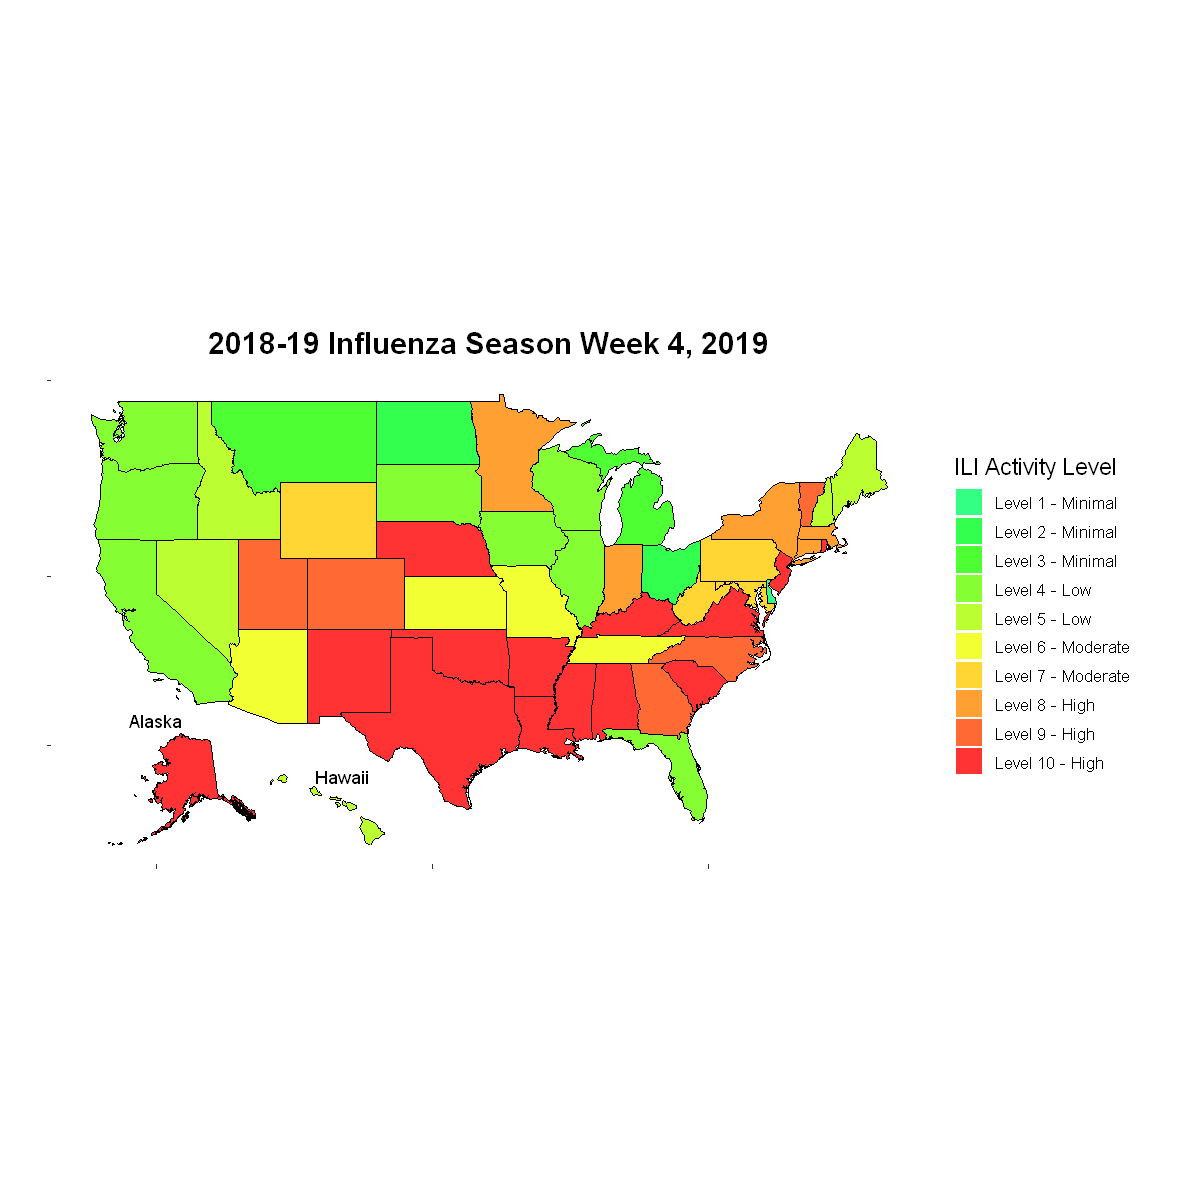

In [13]:
########################### 5 - Plot the Heat Map ###########################################
library(ggplot2)
library(maps)
library(fiftystater)
data("fifty_states")

heatmap_data <- read.csv("data/StateDataforMap_2018-19week4.csv", header=TRUE)

heatmap_data$region <- tolower(heatmap_data$STATENAME)
fifty_states$region <- fifty_states$id

#states <- map_data("state")
levels <- as.character(heatmap_data$ACTIVITY.LEVEL)

for (i in c(1:length(levels))){
   levels[i] <- substr(levels[i], start=7, stop=nchar(levels[i]))
}

heatmap_data$ACTIVITY.LEVEL <- strtoi(levels)

flu_map <- merge(fifty_states, heatmap_data, by="region", all.heatmap_data = T)
flu_map <- flu_map[order(flu_map$order),]


plot_theme <- theme(panel.background = element_blank(),
                    plot.margin = unit(c(1,1,1,1), "cm"),
                    plot.title=element_text(size=18, 
                                            face="bold", 
                                            color="black",
                                            hjust=0.5,
                                            lineheight=1.0),  # title
                    plot.subtitle=element_text(size=16, 
                                               color = "black",
                                               face="bold",
                                               hjust=0.5),  # subtitle
                    plot.caption=element_text(size=15),  # caption
                    axis.title.x=element_blank(),
                    axis.title.y = element_blank(),
                    axis.text.x = element_blank(),  # X axis text
                    axis.text.y=element_blank(),
                    axis.line = element_blank(),
                    legend.title = element_text(size=14),
                    legend.key = element_blank(),
                    legend.text = element_text(size=10))  # Y axis text


fluHeatmap <- ggplot(flu_map, aes(x=long, y=lat, group=group)) + 
              geom_polygon(aes(fill=flu_map$ACTIVITY.LEVEL), data=fifty_states) +
              #geom_map(aes(fill=flu_map$ACTIVITY.LEVEL, map_id=region), map=fifty_states) +
              geom_path() +
              annotate("text", x=-120, y=31.5, label="Alaska") +
              annotate("text", x = -106.5, y = 28, label = "Hawaii") +
              labs(title = "2018-19 Influenza Season Week 4, 2019", y = "", x = "") +
              plot_theme + guides(fill=guide_legend(title = "ILI Activity Level")) +
               scale_fill_gradientn(colors=rev(rainbow(n = 10, start=0, end=0.4, alpha = 0.8)), 
                                    breaks = seq(1, 10, by=1), na.value="grey90", 
                                   labels = c("Level 1 - Minimal", "Level 2 - Minimal", "Level 3 - Minimal", 
                                              "Level 4 - Low", "Level 5 - Low", "Level 6 - Moderate", 
                                              "Level 7 - Moderate", "Level 8 - High", "Level 9 - High", 
                                              "Level 10 - High")) +
              coord_map()

fluHeatmap
ggsave("5.CDC_HeatMap.png", plot = fluHeatmap, dpi=300, width = 30, height = 20, units="cm")